# Assessing significance of very loud signals

Finally, let's go back to considering the signal we started with; the very loud signal:

Text(0, 0.5, 'Cross correlation')

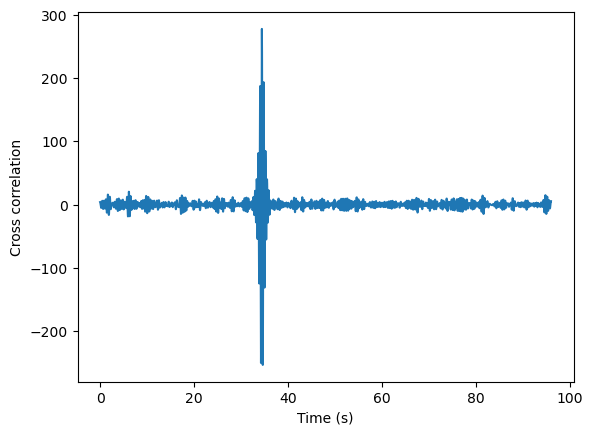

In [2]:
# standard imports
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal

# REPLACE THIS ONE
from crosscorr_utils import compute_cross_correlation

def make_signal_and_data(
    signal_loudness,
    random_seed=21,
    sample_rate = 32, # 32 samples per second
    length_of_data = 128, # 128 seconds worth of data. MUST BE A MULTIPLE OF 8!
    signal_gaussian_width = 1.,
    signal_chirpiness = 1.,
):

    # Some settings for the data
    num_data_samples = length_of_data*sample_rate # 128 seconds worth of data
    times = np.arange(num_data_samples) / sample_rate

    # Make the signal
    signal_inst_frequency = 2. + signal_chirpiness*np.sin(2 * np.pi * 0.1 * times)
    phases = [0]
    for i in range(1,len(times)):
        phases.append(phases[-1] + 2 * np.pi * signal_inst_frequency[i] * 1./sample_rate)
    signal = np.sin(phases)
    gaussian = np.exp( - (times - 64)**2 / (2 * signal_gaussian_width))
    signal = gaussian * np.sin(phases)
    # This takes a quarter of the signal (centered on the peak) to add to the data.
    # The signal should be 0, or close to it, outside of this period.
    signal = signal[length_of_data*3//8 * sample_rate:length_of_data*5//8 * sample_rate]

    # Make the noise, and add a signal to the noise at an unknown spot
    # Set seed so we get the same dataset!
    np.random.seed(random_seed)
    noise = np.random.normal(size=[num_data_samples])
    rndi = np.random.randint(0,sample_rate*(length_of_data*3//4))
    data = noise
    data[rndi:rndi+len(signal)] += signal*signal_loudness
    
    return data, signal

signal_loudness = 10
data, signal = make_signal_and_data(signal_loudness)
cc = compute_cross_correlation(signal, data)
plt.plot(np.arange(32*96) / 32, cc)
plt.xlabel('Time (s)')
plt.ylabel('Cross correlation')

## Assessing the significance

We observed that this signal is clearly above the noise and therefore must be real. But that's not really quantitative. Can we compute a false alarm rate for this signal? In the final exercise of this notebook let's try to do that using the following steps:

* Compute a large number of cases where you cross-correlate this signal against *noise only* data.
* Make a cumulative histogram of this, just as in the previous notebook.
* Can you conduct enough trials to extend the histogram out to the cross-correlation value here (which is almost 300)? If not, how many trials do you think would be needed?
* Now be more quantitative. Extrapolate your cumulative histogram to quantitatively estimate how many trials would be needed, and thus compute a false-alarm rate for this event.
* Plot the extrapolation on the cumulative histogram.
* Does the number you have make sense, and does the extrapolated histogram make sense?